In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

df = pd.read_csv('data/HousingData.csv')
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.isna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
num_missing = df.isna().sum()
num_missing[0:20]

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
pct_missing = df.isna().mean()
pct_missing[:20]

CRIM       0.039526
ZN         0.039526
INDUS      0.039526
CHAS       0.039526
NOX        0.000000
RM         0.000000
AGE        0.039526
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.039526
MEDV       0.000000
dtype: float64

<AxesSubplot: >

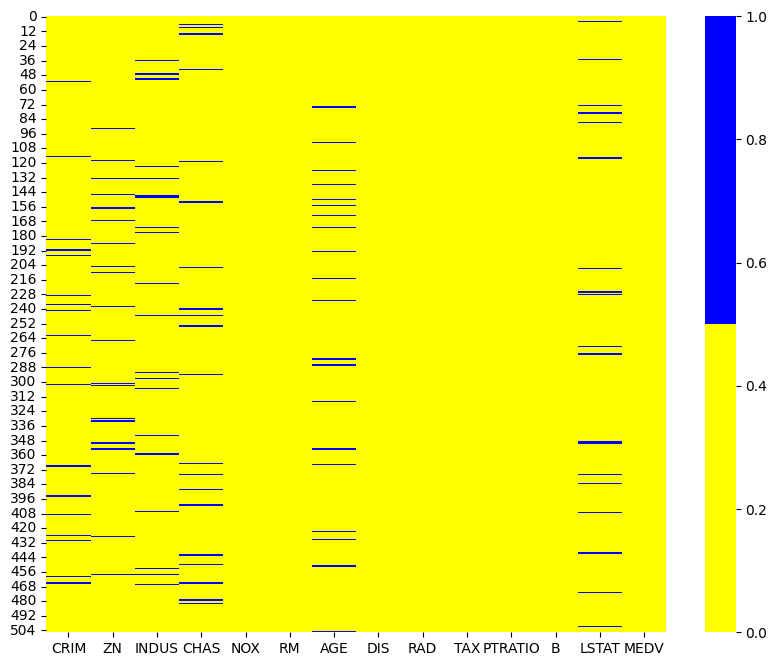

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
cols = df.columns[:30]

colors = ["yellow", "blue"]
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colors))

<AxesSubplot: >

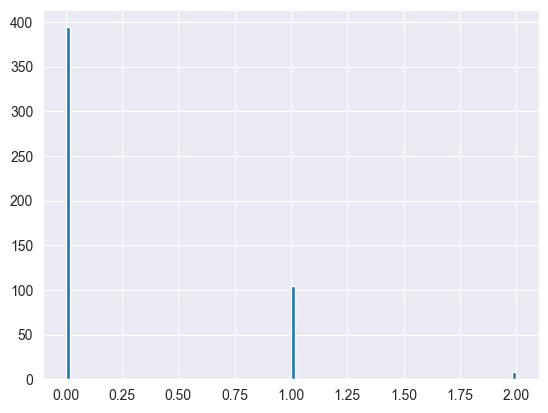

In [17]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=100)

In [15]:
df.kurt(numeric_only=True)[:20]

CRIM       36.568348
ZN          4.132614
INDUS      -1.217991
CHAS        9.478898
NOX        -0.064667
RM          1.891500
AGE        -0.982140
DIS         0.487941
RAD        -0.867232
TAX        -1.142408
PTRATIO    -0.285091
B           7.226818
LSTAT       0.518683
MEDV        1.495197
dtype: float64

In [16]:
df['AGE'].describe()

count    486.000000
mean      68.518519
std       27.999513
min        2.900000
25%       45.175000
50%       76.800000
75%       93.975000
max      100.000000
Name: AGE, dtype: float64

<AxesSubplot: >

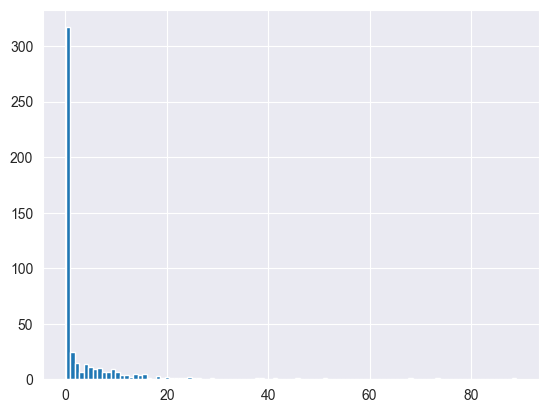

In [21]:
df['CRIM'].hist(bins=100)

<AxesSubplot: >

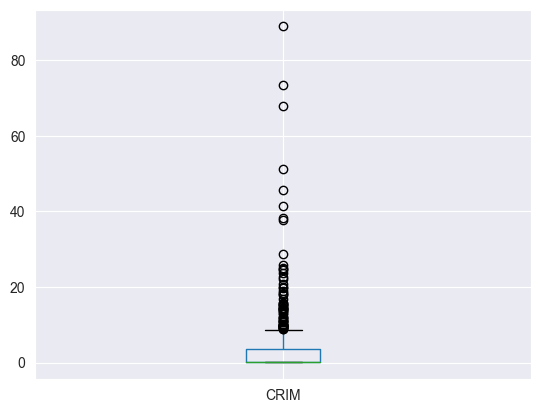

In [22]:
df.boxplot(column=['CRIM'])

<AxesSubplot: >

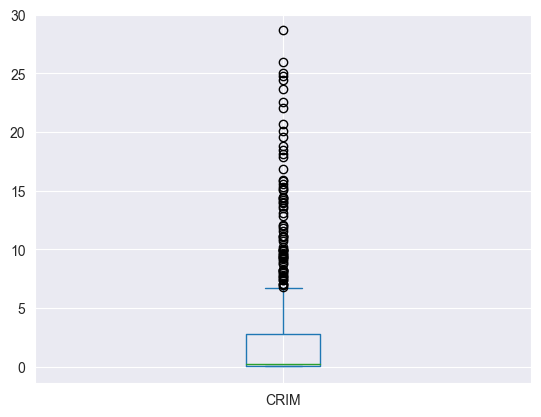

In [26]:
df.CRIM[df.CRIM < 30].plot.box()

In [27]:
df.CRIM.describe()

count    486.000000
mean       3.611874
std        8.720192
min        0.006320
25%        0.081900
50%        0.253715
75%        3.560263
max       88.976200
Name: CRIM, dtype: float64

<AxesSubplot: >

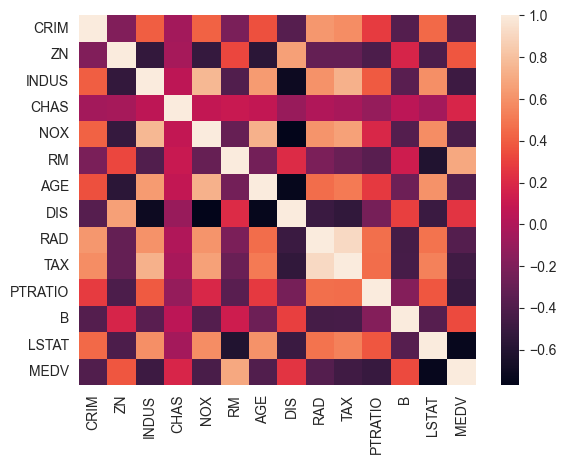

In [28]:
sns.heatmap(df.corr())

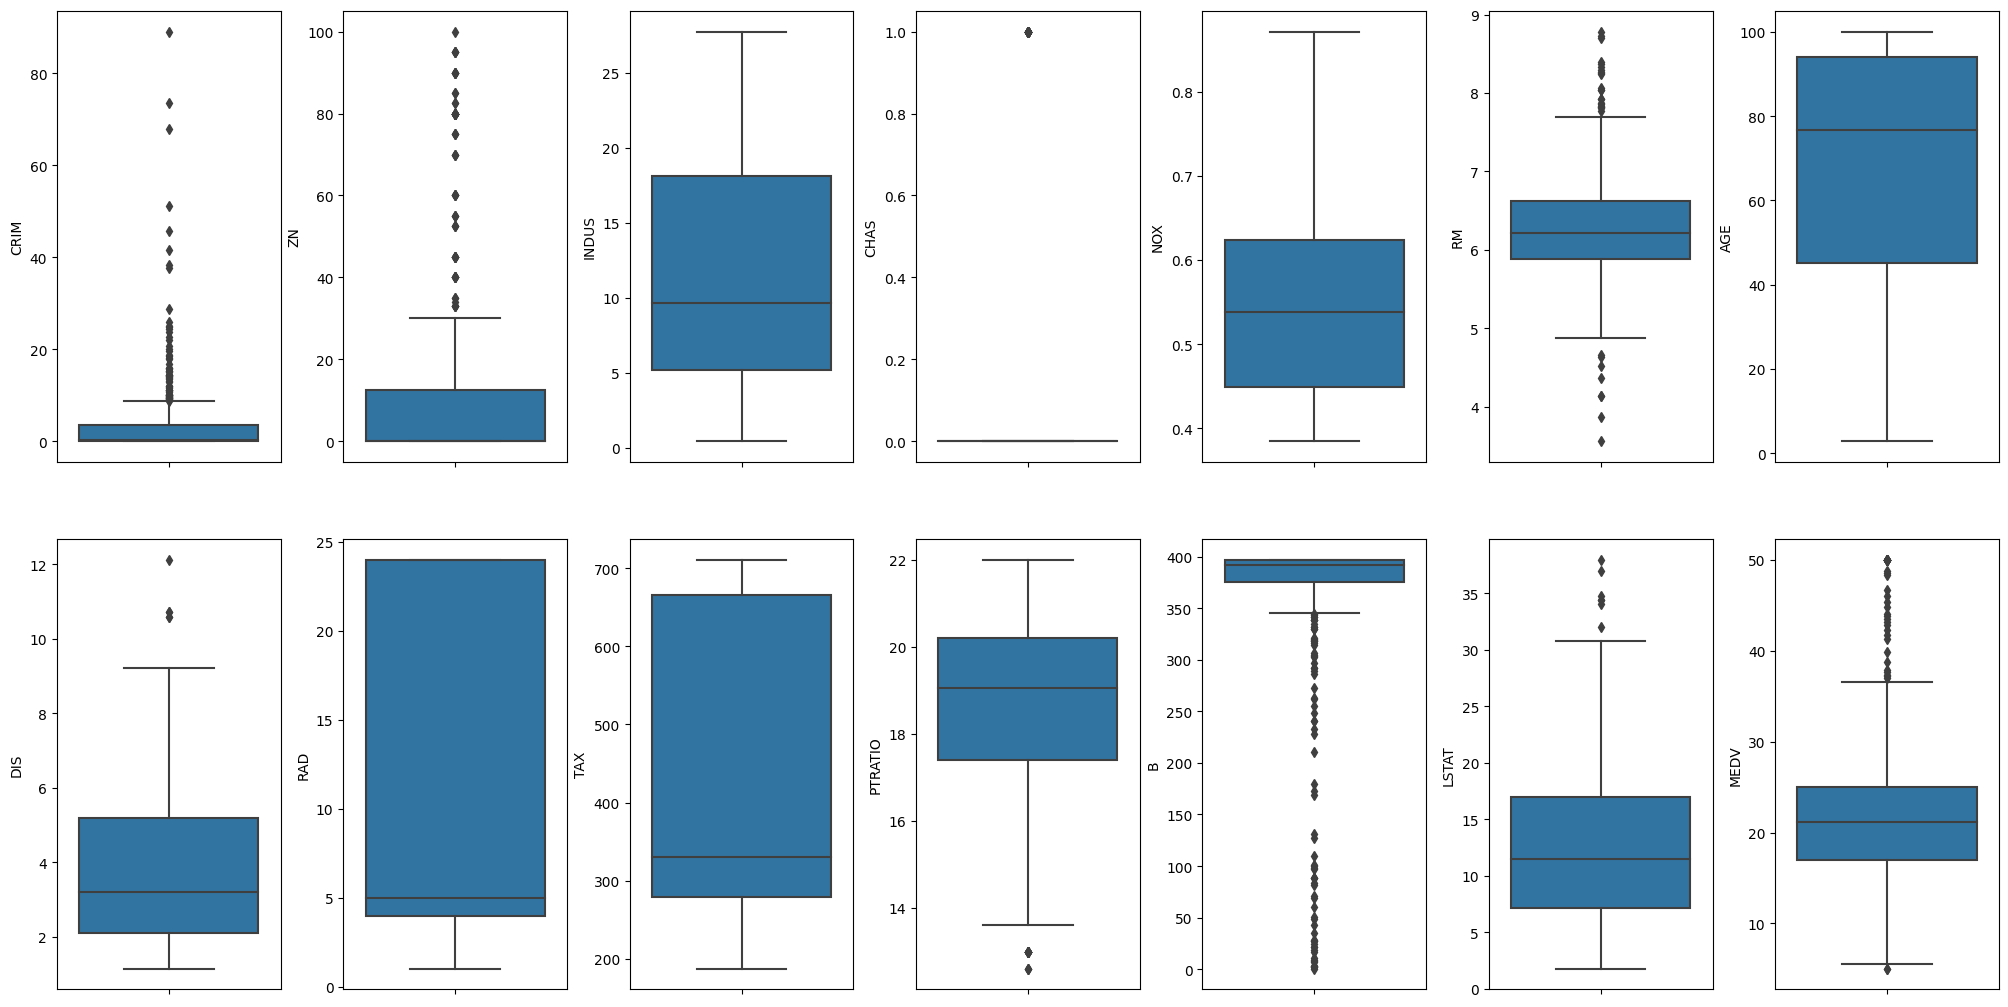

In [22]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)